## 1. 引入所需套件
- Pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- jieba: 中文斷詞套件
- re: 正規表達式套件。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。

In [1]:
from datetime import datetime
from collections import Counter

import jieba
import jieba.analyse
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

In [2]:
# 設定圖的字體
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 2. 實際應用：以PPT八卦版的文本為例

### 2.1 資料蒐集
此次資料蒐集以雞蛋為主題

In [3]:
df = pd.read_csv('./raw_data/sna_egg_1201_0312.csv')
df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,如題\n剛來好市多買雞蛋\n去年買325\n後來漲過一次\n剛才去買變385\n漲幅18%耶...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1669879465....,Re:[問卦]雞蛋漲太兇了吧,2022-12-01 15:24:23,abelppa,Gossiping,哪會啊\n你看日本的蛋不是更貴（？\nhttps://i.imgur.com/hHW2EwX...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""widec"", ""cmt...",220.138.126.218,2022-12-02 01:31:30,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1669882434....,[問卦]克拉克會怎麼賣雞蛋？,2022-12-01 16:13:51,sbflight,Gossiping,克拉克=超人=魔獸=12號\n聽說現在雞蛋有點貴\n但如果是克拉克來賣的話應該會實惠很多吧\...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""k385476916"",...",77.63.109.36,2022-12-02 01:31:53,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,ettoday\n\n石斑魚內外銷告捷「是否留任內閣」 陳吉仲重申：個人去留不重要\n\n記...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1669886550....,[問卦]讓雞蛋也成為護國群山吧！,2022-12-01 17:22:27,Alaba,Gossiping,先前討論過為何准許炒房不准炒蛋\n\n現在蛋價都起來了，接下來是不是就能像當初某部長講的護國...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""koromo1991"",...",114.34.171.176,2022-12-02 01:32:26,ptt
...,...,...,...,...,...,...,...,...,...,...,...
2042,2043,https://www.ptt.cc/bbs/Gossiping/M.1678540614....,[問卦]雞蛋為什麼不像口罩一樣管制？,2023-03-11 21:16:52,kbt2720,Gossiping,當初口罩一片賣十塊，超多人罵\n\n一堆人跑去藥局罵，藥師超怕被說成圖利\n\n後來口罩全部...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""joumay"", ""cm...",123.193.214.32,2023-03-12 01:39:02,ptt
2043,2044,https://www.ptt.cc/bbs/Gossiping/M.1678543191....,[新聞]影／年紀一大把為5顆蛋排隊婦大罵民進黨,2023-03-11 21:59:49,HTC92,Gossiping,1.媒體來源:\n聯合報\n\n2.記者署名:\n林佳彣\n\n\n\n3.完整新聞標題:\...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""carsly"", ""cm...",220.137.230.101,2023-03-12 01:39:28,ptt
2044,2045,https://www.ptt.cc/bbs/Gossiping/M.1678545486....,[問卦]會懷念以前雞蛋隨便砸的日子嗎？,2023-03-11 22:38:02,cary4A240022,Gossiping,以前\n\n人民有任何不滿\n\n想要上街頭抗議\n\n一言不合就是蛋洗伺候\n\n但現在\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""k385476916"",...",133.106.78.171,2023-03-12 01:39:56,ptt
2045,2046,https://www.ptt.cc/bbs/Gossiping/M.1678546924....,[新聞]毛豬交易價破90元飆新高豬農：以後沒雞蛋、也沒豬肉吃,2023-03-11 23:02:00,CREA,Gossiping,聯合報\n2023-03-11 20:27\n記者葉冠妤／台北即時報導\n\n\n毛豬交易價...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""coffee112"", ...",61.61.82.206,2023-03-12 01:40:24,ptt


### 2.2 資料初步清理
清除內文為空值的文章<br>
透過觀察發現ptt的文章常用兩個換行符號作為句子的結尾，因此將兩個換行取代為句號，並清除不重要的字如換行、網址

In [4]:
clear_df = df.copy()

#去除有包含空值的筆數
clear_df.dropna(axis=0, how='any')

#用'。'取代'\n\n'，並移除'\n'
clear_df = clear_df.replace(r'\\n\\n', '。', regex=True).replace(r'\n', '', regex=True)

#移除內文中的網址
clear_df['artContent'] = clear_df['artContent'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,如題剛來好市多買雞蛋去年買325後來漲過一次剛才去買變385漲幅18%耶太扯了吧連吃的營養健...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1669879465....,Re:[問卦]雞蛋漲太兇了吧,2022-12-01 15:24:23,abelppa,Gossiping,哪會啊你看日本的蛋不是更貴（？,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""widec"", ""cmt...",220.138.126.218,2022-12-02 01:31:30,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1669882434....,[問卦]克拉克會怎麼賣雞蛋？,2022-12-01 16:13:51,sbflight,Gossiping,克拉克=超人=魔獸=12號聽說現在雞蛋有點貴但如果是克拉克來賣的話應該會實惠很多吧有沒有克拉...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""k385476916"",...",77.63.109.36,2022-12-02 01:31:53,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,ettoday石斑魚內外銷告捷「是否留任內閣」 陳吉仲重申：個人去留不重要記者楊惠琪／台北報...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1669886550....,[問卦]讓雞蛋也成為護國群山吧！,2022-12-01 17:22:27,Alaba,Gossiping,先前討論過為何准許炒房不准炒蛋現在蛋價都起來了，接下來是不是就能像當初某部長講的護國群山房地...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""koromo1991"",...",114.34.171.176,2022-12-02 01:32:26,ptt
...,...,...,...,...,...,...,...,...,...,...,...
2042,2043,https://www.ptt.cc/bbs/Gossiping/M.1678540614....,[問卦]雞蛋為什麼不像口罩一樣管制？,2023-03-11 21:16:52,kbt2720,Gossiping,當初口罩一片賣十塊，超多人罵一堆人跑去藥局罵，藥師超怕被說成圖利後來口罩全部徵收只能用健保卡...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""joumay"", ""cm...",123.193.214.32,2023-03-12 01:39:02,ptt
2043,2044,https://www.ptt.cc/bbs/Gossiping/M.1678543191....,[新聞]影／年紀一大把為5顆蛋排隊婦大罵民進黨,2023-03-11 21:59:49,HTC92,Gossiping,1.媒體來源:聯合報2.記者署名:林佳彣3.完整新聞標題:影／年紀一大把為5顆蛋排隊 婦大罵...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""carsly"", ""cm...",220.137.230.101,2023-03-12 01:39:28,ptt
2044,2045,https://www.ptt.cc/bbs/Gossiping/M.1678545486....,[問卦]會懷念以前雞蛋隨便砸的日子嗎？,2023-03-11 22:38:02,cary4A240022,Gossiping,以前人民有任何不滿想要上街頭抗議一言不合就是蛋洗伺候但現在套一句經典的台灣話光生吃都不夠了還...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""k385476916"",...",133.106.78.171,2023-03-12 01:39:56,ptt
2045,2046,https://www.ptt.cc/bbs/Gossiping/M.1678546924....,[新聞]毛豬交易價破90元飆新高豬農：以後沒雞蛋、也沒豬肉吃,2023-03-11 23:02:00,CREA,Gossiping,聯合報2023-03-11 20:27記者葉冠妤／台北即時報導毛豬交易價破90元飆新高 豬農...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""coffee112"", ...",61.61.82.206,2023-03-12 01:40:24,ptt


### 2.3 斷句
中文主要以標點符號進行斷句，並清除空的字串

In [5]:
clear_df['artContent'] = clear_df['artContent'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('artContent').reset_index(drop=True)

# 把長度小於1的content刪掉
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,如題剛來好市多買雞蛋去年買325後來漲過一次剛才去買變385漲幅18%耶太扯了吧連吃的營養健...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1669879465....,Re:[問卦]雞蛋漲太兇了吧,2022-12-01 15:24:23,abelppa,Gossiping,哪會啊你看日本的蛋不是更貴（,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""widec"", ""cmt...",220.138.126.218,2022-12-02 01:31:30,ptt
3,3,https://www.ptt.cc/bbs/Gossiping/M.1669882434....,[問卦]克拉克會怎麼賣雞蛋？,2022-12-01 16:13:51,sbflight,Gossiping,克拉克=超人=魔獸=12號聽說現在雞蛋有點貴但如果是克拉克來賣的話應該會實惠很多吧有沒有克拉...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""k385476916"",...",77.63.109.36,2022-12-02 01:31:53,ptt
5,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,ettoday石斑魚內外銷告捷「是否留任內閣」 陳吉仲重申：個人去留不重要記者楊惠琪／台北報...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
6,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,日方首批將採購5萬公噸,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
...,...,...,...,...,...,...,...,...,...,...,...
31996,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,他表示,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt
31997,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,因應禽流感和氣候溫度因素,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt
31998,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,農委會已經近相當大努力,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt
31999,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,不足盡量補足,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt


### 2.4 斷詞
斷詞引擎設定：使用 Jieba 當作斷詞系統。
另外可能還有一些專有名詞是沒有被包含在預設字典當中，我們也可以使用自定義字典的方式加入，或者使用參數的形式帶入。

In [6]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt
# 將user_dict改為以下字詞陳吉仲、好市多、好事多、產蛋率、吉仲
jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict('dict/user_dict.txt')

Building prefix dict from c:\Users\collin\Desktop\社群媒體\讀書會報告\dict\dict.txt ...
Loading model from cache C:\Users\collin\AppData\Local\Temp\jieba.ucd64d243ae31dbb35d1a9a853fc57a5f.cache
Loading model cost 0.598 seconds.
Prefix dict has been built successfully.


斷詞前先將標點符號清除，並清除空字串

In [7]:
sent_df['artContent'] = sent_df['artContent'].str.replace(r'[^\w\s\d]+', '', regex=True).astype(str)
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,如題剛來好市多買雞蛋去年買325後來漲過一次剛才去買變385漲幅18耶太扯了吧連吃的營養健康...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1669879465....,Re:[問卦]雞蛋漲太兇了吧,2022-12-01 15:24:23,abelppa,Gossiping,哪會啊你看日本的蛋不是更貴,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""widec"", ""cmt...",220.138.126.218,2022-12-02 01:31:30,ptt
3,3,https://www.ptt.cc/bbs/Gossiping/M.1669882434....,[問卦]克拉克會怎麼賣雞蛋？,2022-12-01 16:13:51,sbflight,Gossiping,克拉克超人魔獸12號聽說現在雞蛋有點貴但如果是克拉克來賣的話應該會實惠很多吧有沒有克拉克會怎...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""k385476916"",...",77.63.109.36,2022-12-02 01:31:53,ptt
5,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,ettoday石斑魚內外銷告捷是否留任內閣 陳吉仲重申個人去留不重要記者楊惠琪台北報導農委會...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
6,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,日方首批將採購5萬公噸,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
...,...,...,...,...,...,...,...,...,...,...,...
31996,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,他表示,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt
31997,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,因應禽流感和氣候溫度因素,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt
31998,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,農委會已經近相當大努力,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt
31999,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,不足盡量補足,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt


使用jieba進行斷詞

In [8]:
word_df = sent_df.assign(word = sent_df['artContent'].apply(jieba.lcut)).explode('word').drop(['artContent'], axis=1)

word_df = word_df.loc[word_df['word'].str.len()>1]

word_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,如題
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,剛來
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,好市多
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,雞蛋
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,去年
...,...,...,...,...,...,...,...,...,...,...,...
32000,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,努力
32000,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,我們
32000,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,應該
32000,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,予以


### 2.5 移除停用字

In [9]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
# 新增目前、連結、標題、知道、報導、指出....等停用字
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

移除dataframe中的停用字

In [10]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,如題
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,剛來
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,好市多
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,雞蛋
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,去年
...,...,...,...,...,...,...,...,...,...,...,...
31999,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,盡量
31999,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,補足
32000,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,努力
32000,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,予以


### 2.6 計算詞頻

In [11]:
freq_df = pd.DataFrame({'freq':noStop_df.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df = freq_df[clist]
freq_df

,word,freq
0,雞蛋,4429
1,台灣,1831
2,新聞,1140
3,蛋價,1079
4,價格,1063
...,...,...
24417,太忙,1
24418,太強,1
24419,他會前,1
24420,太平,1


### 2.7 視覺化結果

#### 繪製詞頻為前10高的長條圖

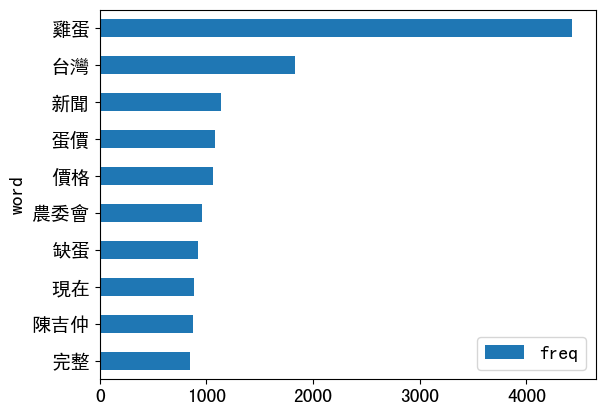

In [12]:
freq_df.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

### 2.8 更新停用字字典

In [13]:
# 參數形式手動加入停用字
stopwords_manual = ["名稱","營業", "有沒有", "就是", "完整", "有無", "是否","現在", "如題", "剛來", "325", "署名","他會前","他家出"]
stopwords.extend(stopwords_manual)

In [14]:
noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_2

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,好市多
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,雞蛋
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,去年
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,漲過
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,一次
...,...,...,...,...,...,...,...,...,...,...,...
31999,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,盡量
31999,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,補足
32000,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,努力
32000,2047,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,[新聞]解蛋荒先以專案進口補足陳吉仲:如做不好,2023-03-11 23:55:52,deathdecay,Gossiping,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a3221715"", ""...",220.137.156.189,2023-03-12 01:40:57,ptt,予以


#### 重新計算詞頻

In [15]:
freq_df_2 = pd.DataFrame({'freq':noStop_df_2.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']  
freq_df_2 = freq_df_2[clist]
freq_df_2

,word,freq
0,雞蛋,4429
1,台灣,1831
2,新聞,1140
3,蛋價,1079
4,價格,1063
...,...,...
24405,火冒三丈,1
24406,參選人,1
24407,火槍,1
24408,參考參考,1


#### 重新繪製詞頻長條圖

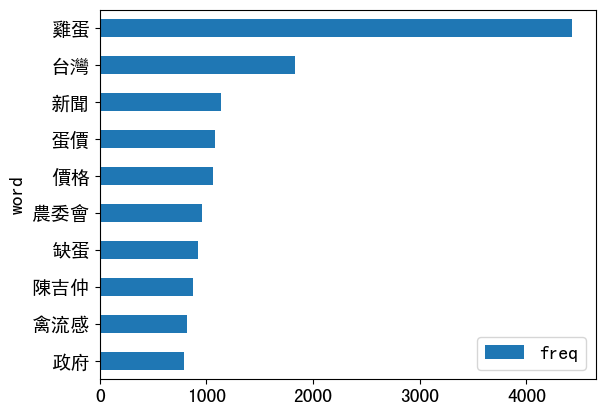

In [16]:
freq_df_2.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

### 2.9 繪製文字雲
在2.4已使用新的斷詞字典

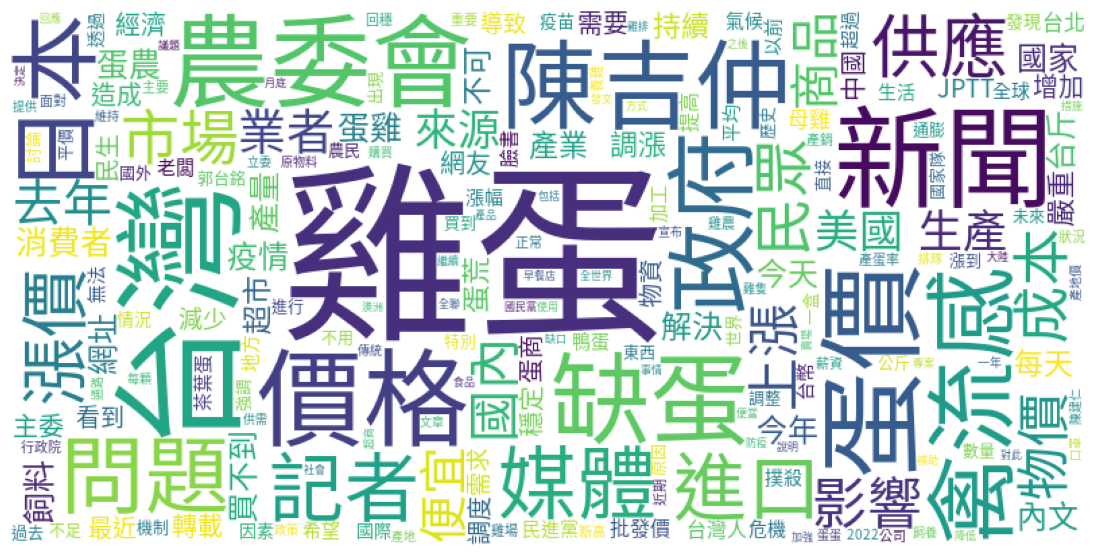

In [17]:
# 詞頻變成dict
freq_dict = freq_df_2.set_index('word', inplace=False).to_dict()
freq_dict = freq_dict['freq']

# 繪製文字雲
FontPath = 'raw_data/SourceHanSansTW-Regular.otf' # 設定字型
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=FontPath, max_words=200)
wordcloud.generate_from_frequencies(freq_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis('off')
# plt.show()

# 儲存並顯示文字雲
plt.savefig('pic/wordcloud.png', bbox_inches='tight')

從2022/12/01-2023/3/12 <br>
主要原因:禽流感導致蛋雞大量撲殺，供給不足，造成蛋價上漲。<br>
次要原因:受疫情影響，國際飼料上漲，導致養雞成本上升，近一步推動蛋價上漲。<br>
新聞媒體將缺蛋問題歸咎在農委會、陳吉仲主委跟台灣政府上面<br>
台灣政府擬透過從日本與美國進口雞蛋試圖平穩台灣蛋價
(新聞好像是美日也缺蛋)

儲存clean data，以便後續其他使用

In [18]:
noStop_df_2.to_csv("raw_data/clean_egg_1201_0312_data.csv", encoding = 'utf-8',index = False)

## 3. lexicon-base 情緒分析
進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併

### 3.1 準備LIWC字典  
- 全名Linguistic Inquiry and Word Counts，由心理學家Pennebaker於2001出版  
>  就英文版的LIWC2007來說，目前包含了64個定義類別。這些類別包括基本的語文向度類別，例如： 22個語文特性類別（如，代名詞、冠詞等百分比）、3個副語言學（paralinguistic）類別（如應和詞、停頓詞等）。除了已經有具有明確定義的語文類別之外，LIWC也另外包含了32個心理特性類別（如，情感詞、認知詞等）、7個個人化類別（如工作、休閒活動等）。再加上程式自動計算出的6個一般描述性類別（總詞數、每句詞數等）以及12個標點符號類別（如句點、逗點等），總計可輸出80個字詞類別。
- https://cliwc.weebly.com/liwc20073542220856.html 
- https://cliwc.weebly.com/35422208563900621029200131228933521259913549826126.html

In [19]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

,word,sentiments
0,):,affect
1,3q,affect
2,:(,affect
3,:),affect
4,<3,affect


In [20]:
liwc_dict['sentiments'].value_counts()

affect      2061
negative    1172
positive     730
anger        358
sad          192
anx          169
Name: sentiments, dtype: int64

In [21]:
ptt_df = noStop_df_2.copy()
ptt_df["artDate"] = pd.to_datetime(ptt_df["artDate"])

In [22]:
ptt_df["artDate"].describe(datetime_is_numeric=True)

count                           159621
mean     2023-02-08 02:36:18.650603776
min                2022-12-01 15:06:50
25%                2023-01-23 00:00:52
50%                2023-02-21 00:27:03
75%                2023-02-25 20:00:03
max                2023-03-11 23:55:52
Name: artDate, dtype: object

In [23]:
ptt_df["artDate"] = ptt_df["artDate"].dt.date

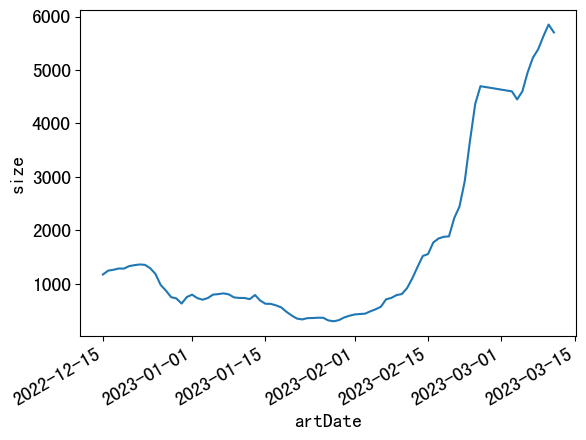

In [24]:
ptt_line_plot = ptt_df.groupby(["artDate"], as_index=False).size()

fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_line_plot["artDate"], ptt_line_plot["size"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel('size')
fig.autofmt_xdate()
plt.show()

從2/15開始雞蛋議題討論開始熱絡

### 3.2 情緒字典與斷詞結果進行合併
將情緒字典與斷詞結果進行合併。。

In [25]:
ptt_liwc_df = pd.merge(ptt_df[["artDate", "artUrl", "word"]], liwc_dict, how="left")
ptt_liwc_df

,artDate,artUrl,word,sentiments
0,2022-12-01,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,好市多,NaN
1,2022-12-01,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,雞蛋,NaN
2,2022-12-01,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,去年,NaN
3,2022-12-01,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,漲過,NaN
4,2022-12-01,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,一次,NaN
...,...,...,...,...
170132,2023-03-11,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,補足,NaN
170133,2023-03-11,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,努力,NaN
170134,2023-03-11,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,予以,NaN
170135,2023-03-11,https://www.ptt.cc/bbs/Gossiping/M.1678550154....,肯定,affect


### 3.3 正負向情緒分數聲量折線圖圖
分別畫出文集中，正向（positive）與負向（negative）情緒的折線圖

In [26]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"], dropna=False, as_index=False).size()
)
sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
0,2022-12-01,affect,34
1,2022-12-01,anger,7
2,2022-12-01,anx,5
3,2022-12-01,negative,17
4,2022-12-01,positive,15
...,...,...,...
594,2023-03-11,anger,24
595,2023-03-11,anx,10
596,2023-03-11,negative,107
597,2023-03-11,positive,162


In [27]:
sentiment_count["sentiments"] == "positive"

0      False
1      False
2      False
3      False
4       True
       ...  
594    False
595    False
596    False
597     True
599    False
Name: sentiments, Length: 600, dtype: bool

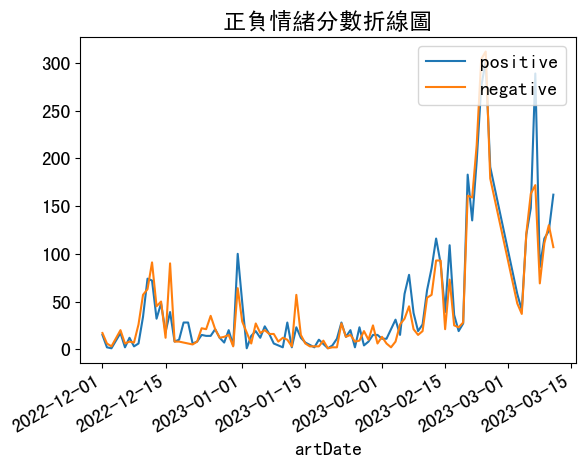

In [28]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖")  # 記得加上才能顯示中文
plt.show()

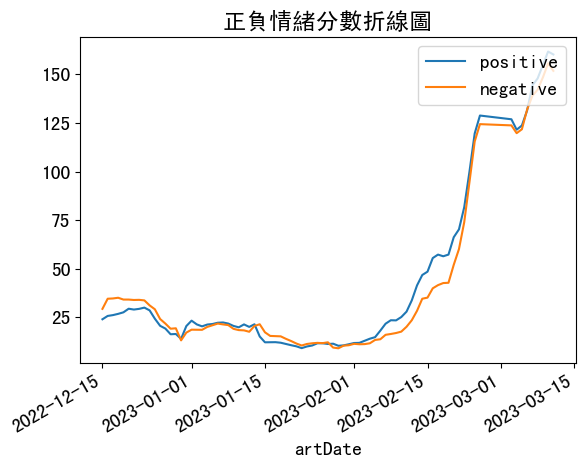

In [29]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天移動平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖")  # 記得加上才能顯示中文
plt.show()

### 3.4 正負向情緒分數比例折線圖圖

In [30]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

,artDate,sentiments,size,ratio
0,2022-12-01,affect,34,0.061706
1,2022-12-01,anger,7,0.012704
2,2022-12-01,anx,5,0.009074
3,2022-12-01,negative,17,0.030853
4,2022-12-01,positive,15,0.027223
...,...,...,...,...
594,2023-03-11,anger,24,0.005378
595,2023-03-11,anx,10,0.002241
596,2023-03-11,negative,107,0.023975
597,2023-03-11,positive,162,0.036298


In [31]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

Text(0.5, 1.0, '正負情緒比例折線圖')

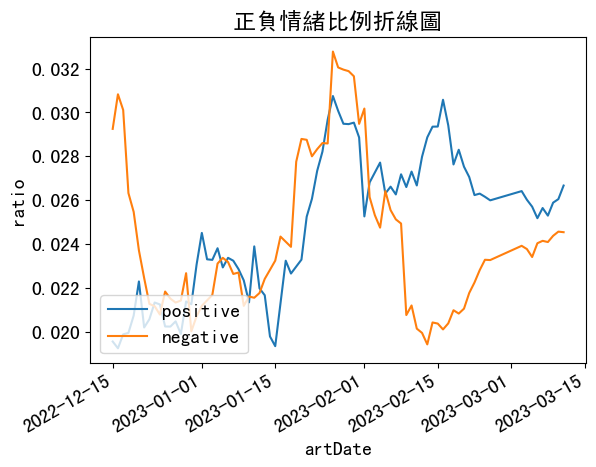

In [32]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖")

1.找3/1-3/12 發生甚麼事 情緒分數下降嚴重 <br>
行政院長陳建仁2/22表示，預估缺蛋3月初就會有所緩解，但馬上被強力抨擊，甚至多數人為4、5月不缺蛋就不錯，也導致大約從2/22負面字不斷急遽上升<br>
2.找2/15 (從IP找為甚麼正負情緒相差這麼大) 之後再做即可。<br>
Q2 2/15 可能原因 <br>
1.可能因為農委會說蛋價回穩 <br>
2.疫後特別條例 改善雞蛋跟蛋商設備 <br>

### 3.5 文字雲
針對不同日期畫出該天的文字雲，如果文字雲中的字詞大小越大，代表出現頻率越高

In [33]:
mask = sentiment_count['sentiments'] == 'positive'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

,artDate,sentiments,size,ratio
527,2023-02-24,positive,302,0.026671
569,2023-03-07,positive,289,0.037778
520,2023-02-23,positive,275,0.022724
513,2023-02-22,positive,197,0.024306
534,2023-02-25,positive,191,0.026932


#### 2023-02-24 文字雲
2023-02-24 是正面詞彙次數最高的一天。我們可以用文字雲來觀察，八卦版在這天最常出現的正面情緒字有哪些。

In [34]:
date = "2023-02-24"
mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date))
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

C:\Users\collin\AppData\Local\Temp\ipykernel_24320\493727543.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date))


[('雞蛋', 362),
 ('問題', 180),
 ('缺蛋', 136),
 ('解決', 98),
 ('農委會', 91),
 ('陳吉仲', 91),
 ('禽流感', 82),
 ('政府', 77),
 ('台灣', 75),
 ('進口', 74),
 ('新聞', 68),
 ('供應', 58),
 ('嚴重', 54),
 ('蛋價', 49),
 ('蛋農', 48),
 ('價格', 46),
 ('國內', 46),
 ('民眾', 46),
 ('不足', 45),
 ('記者', 43)]

(-0.5, 799.5, 399.5, -0.5)

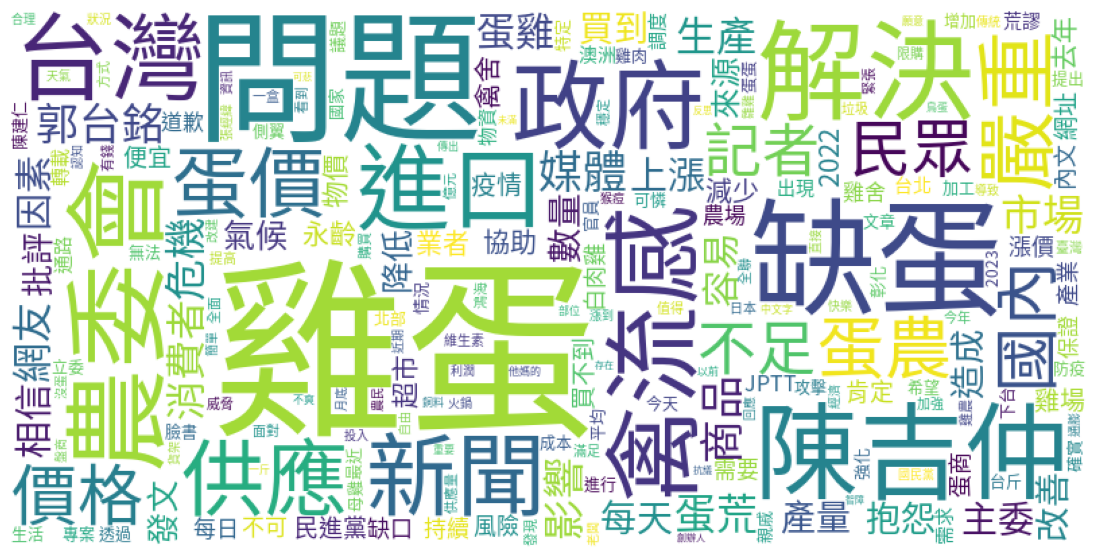

In [35]:
font_path = "raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
# cloud = WordCloud(max_words=200, background_color="white", font_path=font_path)
# cloud.generate_from_frequencies(wc)

cloud = WordCloud(background_color='white',width=800, height = 400, font_path=font_path, max_words=200)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize = (14,7))
# plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud)
plt.axis("off")
# plt.show()

C:\Users\collin\AppData\Local\Temp\ipykernel_24320\1730698171.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask = (ptt_liwc_df["artDate"] == pd.Timestamp(date)) & (


(-0.5, 799.5, 399.5, -0.5)

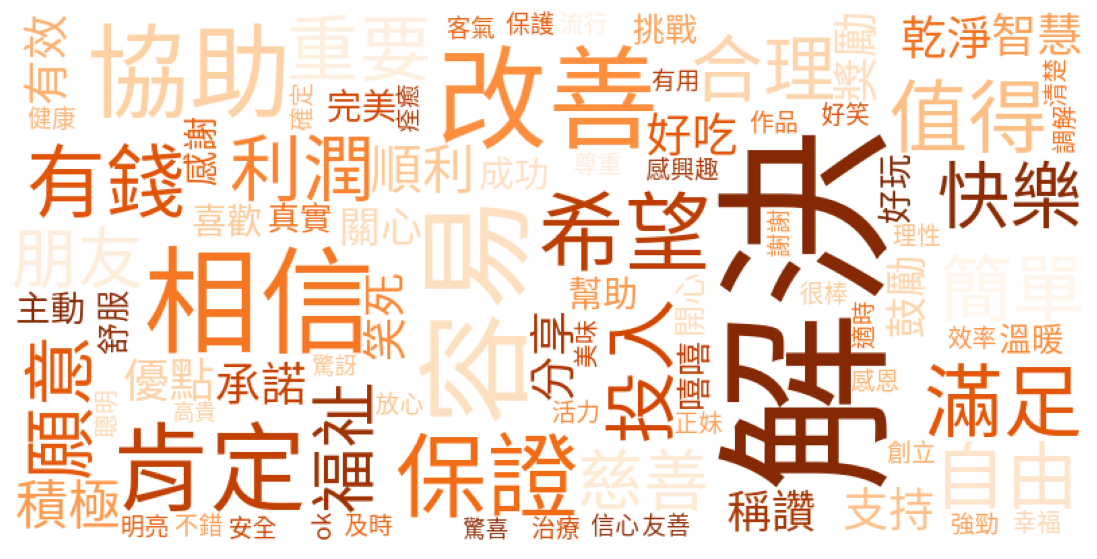

In [36]:
date = "2023-02-24"
mask = (ptt_liwc_df["artDate"] == pd.Timestamp(date)) & (
    ptt_liwc_df["sentiments"] == "positive"
)
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

# wordcloud 的 input 是 dictionary
font_path = "raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
# cloud = WordCloud(max_words=200, background_color="white", font_path=font_path, colormap="Oranges")
# cloud.generate_from_frequencies(wc)

cloud = WordCloud(background_color='white',width=800, height = 400, font_path=font_path, max_words=200, colormap="Oranges")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize = (14,7))
# plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud)
plt.axis("off")
# plt.show()

C:\Users\collin\AppData\Local\Temp\ipykernel_24320\3678388086.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask = (ptt_liwc_df["artDate"] == pd.Timestamp(date)) & (


(-0.5, 799.5, 399.5, -0.5)

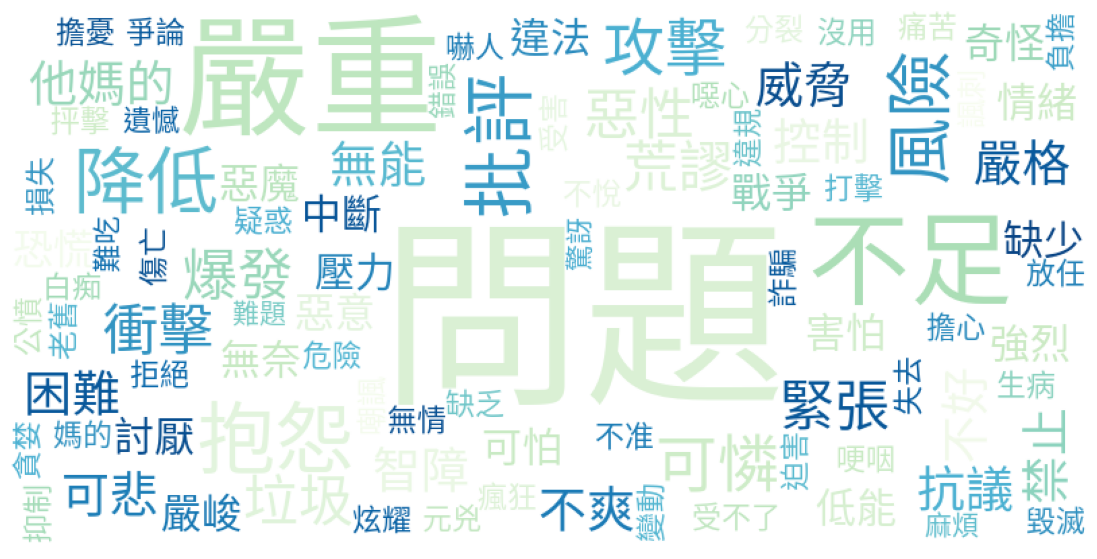

In [37]:
date = "2023-02-24"
mask = (ptt_liwc_df["artDate"] == pd.Timestamp(date)) & (
    ptt_liwc_df["sentiments"] == "negative"
)
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

# wordcloud 的 input 是 dictionary
font_path = "raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
# cloud = WordCloud(max_words=200, background_color="white", font_path=font_path, colormap="GnBu")
# cloud.generate_from_frequencies(wc)

cloud = WordCloud(background_color='white',width=800, height = 400, font_path=font_path, max_words=200, colormap="GnBu")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize = (14,7))
# plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud)
plt.axis("off")
# plt.show()

### 3.6 情緒代表字
從整個文集中計算出正負向情緒字的出現詞頻，並找出情緒的代表字

In [38]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

,word,sentiments,size
410,問題,negative,712
409,問題,affect,712
1582,解決,affect,318
1583,解決,positive,318
455,嚴重,negative,246
...,...,...,...
1042,榮幸,affect,1
1043,榮幸,positive,1
1052,欣喜,affect,1
1053,欣喜,positive,1


In [39]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos

,word,sentiments,size
1583,解決,positive,318
615,希望,positive,174
1742,重要,positive,126
1113,決定,positive,105
960,改善,positive,95
...,...,...,...
1022,有益,positive,1
1037,果斷,positive,1
1043,榮幸,positive,1
1053,欣喜,positive,1


In [40]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg

,word,sentiments,size
410,問題,negative,712
455,嚴重,negative,246
61,不足,negative,151
1766,降低,negative,99
839,戰爭,negative,92
...,...,...,...
1061,欺騙,negative,1
1057,欺詐,negative,1
941,操心,negative,1
1005,暴怒,negative,1


In [41]:
word_of_neg.sort_values(
    ["size"], ascending=False
)

,word,sentiments,size
410,問題,negative,712
455,嚴重,negative,246
61,不足,negative,151
1766,降低,negative,99
839,戰爭,negative,92
...,...,...,...
426,單獨,negative,1
398,哭泣,negative,1
404,哭鬧,negative,1
401,哭訴,negative,1


C:\Users\collin\AppData\Local\Temp\ipykernel_24320\1433489422.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(pos["word"])
C:\Users\collin\AppData\Local\Temp\ipykernel_24320\1433489422.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(neg["word"])


Text(0.5, 1.0, '負向情緒總數')

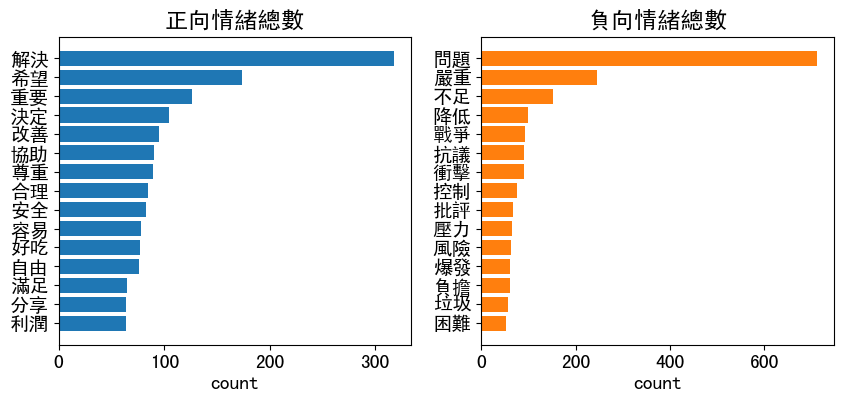

In [42]:
pos = word_of_pos.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]
neg = word_of_neg.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"])
ax[0].set_title("正向情緒總數")

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"])
ax[1].set_title("負向情緒總數")

另外，也可以依據不同日期觀察情緒代表字的變化
#### 2023-02-24 正負情緒代表字

In [43]:
sentiment_count[sentiment_count["sentiments"] == "negative"].sort_values('size', ascending=False)

,artDate,sentiments,size,ratio
526,2023-02-24,negative,312,0.027555
519,2023-02-23,negative,304,0.025120
512,2023-02-22,negative,214,0.026403
533,2023-02-25,negative,179,0.025240
568,2023-03-07,negative,172,0.022484
...,...,...,...,...
182,2022-12-30,negative,3,0.015873
306,2023-01-21,negative,2,0.018349
383,2023-02-03,negative,2,0.016260
311,2023-01-22,negative,2,0.006192


In [44]:
date = '2023-02-24'
mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date)) & (
    ptt_liwc_df["sentiments"].isin(['positive', 'negative'])
)

ptt_df_date = ptt_liwc_df.loc[mask, ["artDate", "word", "sentiments"]]
ptt_df_date_senti = ptt_df_date.groupby(["sentiments", "word"], as_index=False).size()
ptt_df_date_senti.head()

C:\Users\collin\AppData\Local\Temp\ipykernel_24320\3156116361.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date)) & (


,sentiments,word,size
0,negative,不准,1
1,negative,不好,3
2,negative,不悅,1
3,negative,不爽,3
4,negative,不足,15


C:\Users\collin\AppData\Local\Temp\ipykernel_24320\1670547556.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(pos["word"])
C:\Users\collin\AppData\Local\Temp\ipykernel_24320\1670547556.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(neg["word"])


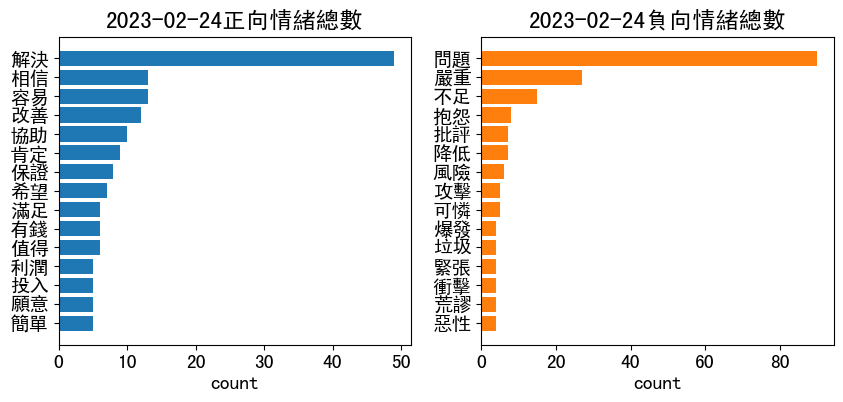

In [45]:
pos = ptt_df_date_senti[(ptt_df_date_senti["sentiments"] == "positive")].sort_values(
    ["size"], ascending=True
)
pos = pos[-15:]
neg = ptt_df_date_senti[ptt_df_date_senti["sentiments"] == "negative"].sort_values(
    ["size"], ascending=True
)
neg = neg[-15:]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_title(f"{date}正向情緒總數")
ax[0].set_yticklabels(pos["word"])

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_title(f"{date}負向情緒總數")
ax[1].set_yticklabels(neg["word"])
plt.show()

### 3.7 每日情緒分數趨勢

In [46]:
sentiment_count

,artDate,sentiments,size,ratio
0,2022-12-01,affect,34,0.061706
1,2022-12-01,anger,7,0.012704
2,2022-12-01,anx,5,0.009074
3,2022-12-01,negative,17,0.030853
4,2022-12-01,positive,15,0.027223
...,...,...,...,...
594,2023-03-11,anger,24,0.005378
595,2023-03-11,anx,10,0.002241
596,2023-03-11,negative,107,0.023975
597,2023-03-11,positive,162,0.036298


In [47]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

,artDate,affect,anger,anx,negative,positive,sad
0,2022-12-01,34,7,5,17,15,2
1,2022-12-02,8,1,0,6,2,1
2,2022-12-03,4,3,0,3,1,0
3,2022-12-05,40,7,3,20,17,2
4,2022-12-06,8,1,0,6,2,1


In [48]:
# sentiment 計算方式: positive - anger - anx - negative - sad
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["anger"]
    - ptt_sentiment_value["anx"]
    - ptt_sentiment_value["negative"]
    - ptt_sentiment_value["sad"]
)
ptt_sentiment_value.head()

,artDate,affect,anger,anx,negative,positive,sad,sentiment_value
0,2022-12-01,34,7,5,17,15,2,-16
1,2022-12-02,8,1,0,6,2,1,-6
2,2022-12-03,4,3,0,3,1,0,-5
3,2022-12-05,40,7,3,20,17,2,-15
4,2022-12-06,8,1,0,6,2,1,-6


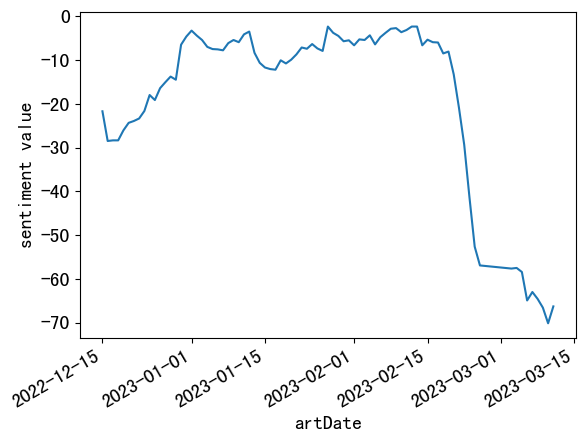

In [49]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()

可以從圖片中看出以下 <br>
1. 情緒分數總和都是負數 <Br>
2. 禽流感高峰大約在每年的12~2月 導致12月開始多為負面<Br>
3. 12月中有回升原因： 陳吉仲保證雞蛋供應無虞。<Br>
4. 從新聞可得知，原訂二月底或三月初蛋價及產量會回穩，但當時間到時，民眾卻沒感覺到成效．並認為政策效果有待討論，因而導致負面情緒急速增加。<Br>